<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Decision Trees and Random Forests
 
_Authors: Arun Ahuja (NYC)_

---

<a id="learning-objectives"></a>
### Learning Objectives

- Understand and build decision tree models for classification and regression
- Understand the differences between linear and non-linear models
- Understand and build random forest models for classification and regression
- Know how to extract the most important predictors in a random forest model

### Lesson Guide
- [Today's dataset: Predicting "Greenness" Of Content](#todays-dataset-predicting-greenness-of-content)
	- [What are 'evergreen' sites?](#what-are-evergreen-sites)
	- [Data Dictionary](#data-dictionary)
- [Part 1: Explore the dataset](#part--explore-the-dataset)
	- [1.1 Does being a news site affect evergreeness?](#-does-being-a-news-site-affect-evergreeness)
	- [1.2 Does category in general affect evergreeness?](#-does-category-in-general-affect-evergreeness)
	- [1.3 How many articles are there per category?](#-how-many-articles-are-there-per-category)
	- [1.4 Explore additional relationships](#-explore-additional-relationships)
	- [1.5 Can you create any additional features?](#-can-you-create-any-additional-features)
- [Introduction to decision trees and random forests](#introduction-to-decision-trees-and-random-forests)
	- [Intuition behind decision trees](#intuition-behind-decision-trees)
	- [What are trees in general?](#what-are-trees-in-general)
	- [How does a computer build a decision tree?](#how-does-a-computer-build-a-decision-tree)
- [Interactive demo using housing price](#interactive-demo-using-housing-price)
	- [Comparison to previous models](#comparison-to-previous-models)
- [Reading decision trees](#reading-decision-trees)
- [Part 2:  Let's Explore Some Decision Trees](#part---lets-explore-some-decision-trees)
	- [2.1 Pre-process dataset](#-pre-process-dataset)
	- [2.2 Build a Decision Tree Model](#-build-a-decision-tree-model)
	- [2.3 Evaluate the Decision Tree Model](#-evaluate-the-decision-tree-model)
- [Demo: Overfitting in decision trees](#demo-overfitting-in-decision-trees)
	- [3.1 Check if the model is overfit by checking accuracy on training set vs test set](#-check-if-the-model-is-overfit-by-checking-accuracy-on-training-set-vs-test-set)
	- [3.2 Demo: Bias vs. Variance](#-demo-bias-vs-variance)
- [Introduction: Ensembles and random forests](#introduction-ensembles-and-random-forests)
- [What is ensembling?](#what-is-ensembling)
	- [Bagging: bootstrap aggregation](#bagging-bootstrap-aggregation)
- [Random Forests](#random-forests)
- [Codealong: Regression with decision trees and random forests](#codealong-regression-with-decision-trees-and-random-forests)
	- [4.1 Demo: Build a random forest model to predict the evergreeness of a website.](#-demo-build-a-random-forest-model-to-predict-the-evergreeness-of-a-website)
	- [4.2 Tune and update the model with grid search](#-tune-and-update-the-model-with-grid-search)
- [Topic review](#topic-review)


<a id="todays-dataset-predicting-greenness-of-content"></a>
## Today's dataset: Predicting "EverGreenness" Of Content


<a id="what-are-evergreen-sites"></a>
### What are 'evergreen' sites?

> #### Evergreen sites are those that are always relevant.  As opposed to breaking news or current events, evergreen websites are relevant no matter the time or season. 

> #### A sample of URLs is below, where label = 1 are 'evergreen' websites

<a id="data-dictionary"></a>
### Data Dictionary

This exercise uses the [Kaggle StumbleUpon Evergreen Classification Challenge](https://www.kaggle.com/c/stumbleupon)

This dataset comes from [StumbleUpon](https://www.stumbleupon.com/), a web page recommender. A description of the columns is below:

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
title|string|Title of the article
body|string|Body text of article
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonlinkratio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonlinkratio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonlinkratio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonlinkratio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

In [2]:
import numpy as np
import pandas as pd
import json
from sklearn import model_selection
from sklearn import grid_search
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.5)
%matplotlib inline

C:\Users\simpl\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\simpl\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
# Load data
data = pd.read_csv("../../dataset/stumbleupon.tsv", sep='\t')

# Split `boilerplate` column
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))

# Check head
data.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,24,0,5424,170,8,0.152941,0.079130,0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,40,0,4973,187,9,0.181818,0.125448,1,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,55,0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,24,0,2737,120,5,0.041667,0.100858,1,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,14,0,12032,162,10,0.098765,0.082569,0,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...


In [4]:
data.boilerplate[2]

'{"title":"Fruits that Fight the Flu fruits that fight the flu | cold & flu | men\'s health","body":"Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent heart disease and cancer Next Papayas With 250 percent of the RDA of vitamin C a papaya can help kick a cold right out of your system The beta carotene and vitamins C and E in papayas reduce inflammation throughout the body lessening the effects of asthma Next Cranberries Cranberries have more antioxidants than other common fruits and veggies One serving has five times the amount in broccoli Cranberries are a natural probiotic enhancing good bacteria levels in the gut and protecting it from foodborne illnesses Next Grapefruit Loaded with vitamin C grapefruit also contains natural compounds called limonoids which can lower cholesterol The red varieties are a potent source of the cancer fighting su

In [5]:
# Check URLs and their evergreen labels
data[['url', 'label']].head()

,url,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,0
1,http://www.popsci.com/technology/article/2012-...,1
2,http://www.menshealth.com/health/flu-fighting-...,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,1
4,http://bleacherreport.com/articles/1205138-the...,0


<a id="part--explore-the-dataset"></a>
## Part 1: Explore the dataset

We will revisit the data science workflow in order to explore the dataset and determine important characteristics for "evergreen" websites.

1. Prior to looking at the available data, brainstorm 3 - 5 characteristics that would be useful for predicting evergreen websites.
2. After looking at the dataset, can you model or quantify any of the characteristics you wanted?
  - For instance, if you believe high-image content websites are likely to be evergreen, then how would you build a feature that represents high image content?
  - Or if you believe weather content ISN'T likely to be evergreen, then how would you build a feature to reflect that?            
3. Does being a news site affect "evergreen-ness"? Compute or plot the percent of evergreen news sites.
4. Does category in general affect evergreen-ness? Plot the rate of evergreen sites for all Alchemy categories.
5. How many articles are there per category?
6. Create a feature for the title containing "recipe". Is the % of evergreen websites higher or lower on pages that have "recipe" in the the title?


<a id="-does-being-a-news-site-affect-evergreeness"></a>
### 1.1 Does being a news site affect evergreeness? 
Compute or plot the percentage of news related evergreen sites.

In [6]:
data.columns

Index([u'url', u'urlid', u'boilerplate', u'alchemy_category',
       u'alchemy_category_score', u'avglinksize', u'commonlinkratio_1',
       u'commonlinkratio_2', u'commonlinkratio_3', u'commonlinkratio_4',
       u'compression_ratio', u'embed_ratio', u'framebased', u'frameTagRatio',
       u'hasDomainLink', u'html_ratio', u'image_ratio', u'is_news',
       u'lengthyLinkDomain', u'linkwordscore', u'news_front_page',
       u'non_markup_alphanum_characters', u'numberOfLinks', u'numwords_in_url',
       u'parametrizedLinkRatio', u'spelling_errors_ratio', u'label', u'title',
       u'body'],
      dtype='object')

In [7]:
# Using groupby()
data.groupby('is_news').label.mean()

is_news
1    0.516916
?    0.507562
Name: label, dtype: float64

In [8]:
data['is_news'].value_counts()

1    4552
?    2843
Name: is_news, dtype: int64

In [9]:
data.shape

(7395, 29)

In [10]:
data['is_news'].dtype

dtype('O')

<a id="-does-category-in-general-affect-evergreeness"></a>
### 1.2 Does category in general affect evergreeness? 
Plot the rate of evergreen sites for all Alchemy categories.

Note: The website categories were collected using AlchemyAPI.

In [11]:
# Using groupby()
data.groupby('alchemy_category').label.mean()

alchemy_category
?                     0.502135
arts_entertainment    0.371945
business              0.711364
computer_internet     0.246622
culture_politics      0.457726
gaming                0.368421
health                0.573123
law_crime             0.419355
recreation            0.684296
religion              0.416667
science_technology    0.456747
sports                0.205263
unknown               0.333333
weather               0.000000
Name: label, dtype: float64

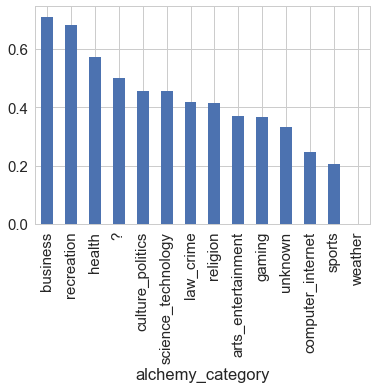

In [12]:
# Using a plot
data.groupby('alchemy_category').label.mean().sort_values(ascending=False).plot(kind='bar')

<a id="-how-many-articles-are-there-per-category"></a>
### 1.3 How many articles are there per category?

In [13]:
# Using groupby()
data.alchemy_category.value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [14]:
data.groupby('alchemy_category').label.count()

alchemy_category
?                     2342
arts_entertainment     941
business               880
computer_internet      296
culture_politics       343
gaming                  76
health                 506
law_crime               31
recreation            1229
religion                72
science_technology     289
sports                 380
unknown                  6
weather                  4
Name: label, dtype: int64

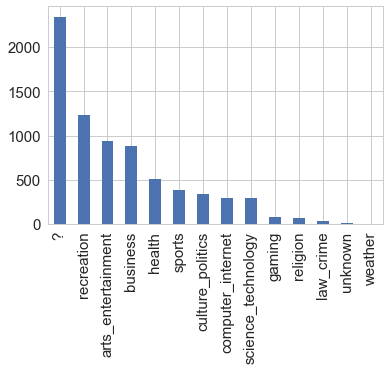

In [15]:
# Using a plot
data.alchemy_category.value_counts().plot(kind='bar')

<a id="-explore-additional-relationships"></a>
### 1.4 Explore additional relationships
Are there any other relationships you brainstormed?

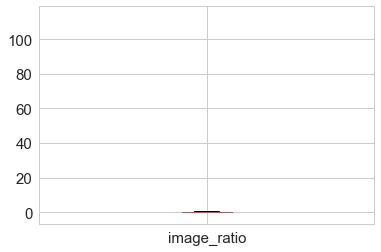

In [16]:
data.image_ratio.plot(kind='box', by='label')

(0, 1)

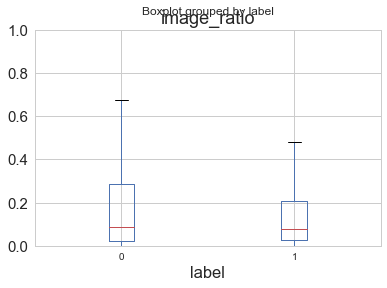

In [17]:
data.boxplot(column='image_ratio', by='label')
plt.ylim([0,1])

In [18]:
data.label.value_counts()

1    3796
0    3599
Name: label, dtype: int64

In [19]:
data.image_ratio.describe()

count    7395.000000
mean        0.275709
std         1.919320
min        -1.000000
25%         0.025900
50%         0.083051
75%         0.236700
max       113.333333
Name: image_ratio, dtype: float64

<a id="-can-you-create-any-additional-features"></a>
### 1.5 Can you create any additional features?
Create a feature that indicates whether the title contains the word 'recipe'. Is the percent of evegreen websites higher or lower on pages that have recipe in the the title?

Hint: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html

In [20]:
# Check if title contains the word 'recipe'
data['recipe_in_title'] = data['title'].str.contains('recipe')

In [21]:
# Using groupby()
data.groupby(['recipe_in_title'])[['label']].mean()

,label
recipe_in_title,
False,0.494452
True,0.892351


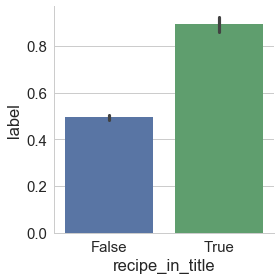

In [22]:
# Using a plot
sns.factorplot(x='recipe_in_title', y='label', kind='bar', data=data)

<a id="introduction-to-decision-trees-and-random-forests"></a>
## Introduction to decision trees and random forests
Objective: Understand decision tree models for classification and regression

<a id="intuition-behind-decision-trees"></a>
### Intuition behind decision trees

Decision trees are like the game “20 questions”.  They make decision by answering a series of questions, most often binary questions (yes or no). 

For example, if we want to classify between squirrels, cats, and dogs, we will collect data about weight. If the weight is less than two pounds, we tend to see squirrels in our data. If the weight is greater than 2 pounds and less than 20 pounds, we may guess dog or cat. If the wieght is greater than 2 pounds and greater than 20 pounds, we will guess dog.

We want the smallest set of questions to get to the right answer.

Each questions should reduce the search space as much as possible.

Decision trees work for both classification and regression problems.

<a id="what-are-trees-in-general"></a>
### What are trees in general?

- Trees are a data structure made up of nodes and branches.
- Each node typically has two or more branches that connect it to its children.
- Each child is another node in the tree and contains its own subtree.  
- Nodes without any children are known as leaf nodes.

**In the case of Decision Trees**
- A decision tree contains a question at every node.
- Depending upon the answer to the question, we proceed down the left or right branch of the tree and ask another question.
- Once we don’t have any more questions (at the leaf nodes), we make a prediction.

<a id="how-does-a-computer-build-a-decision-tree"></a>
### How does a computer build a decision tree?

**Ideal approach**: Consider every possible partition of the feature space (computationally infeasible)
**"Good enough" approach:** recursive binary splitting
1. Begin at the top of the tree.
2. For **every feature**, examine **every possible cutpoint**, and choose the feature and cutpoint such that the resulting tree has the lowest possible mean squared error (MSE). Make that split.
3. Examine the two resulting regions, and again make a **single split** (in one of the regions) to minimize the MSE.
4.Keep repeating step 3 until a **stopping criterion** is met:
- maximum tree depth (maximum number of splits required to arrive at a leaf)
- minimum number of observations in a leaf

<a id="interactive-demo-using-housing-price"></a>
## Interactive demo using housing price

Let’s suppose we want to predict if a house is in SF or NYC.  

Follow along here: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/



<a id="comparison-to-previous-models"></a>
### Comparison to previous models

Pros:
- Decision trees are non-linear (rectilinear), an advantage over logistic regression.
  - A linear model is one in which a change in an input variable has a constant change on the output variable.
- Can find interactions between variables.
- Can take continuous variables and treat them as ordered discrete/ordinal variables.
- Works for both regression and classification.
- Does not need scaling.
- Not greatly affected by outliers.
- Implicitly performs feature selection.

Cons:
- A bit more difficult to interpret.
- Does not give you something like a p-value.
  - Although, there is a way to check overall feature importance.
- Does not fit linear relationships very well.


    Linear vs. non-linear classification models
![Linear vs Non-linear](assets/images/linear_vs_non_linear.png)

For example consider the relationship between years of education and salary

- In a linear model, the increase in salary from 10 to 15 years of education would be the same as the increase in salary from 15 to 20 years of education.  

- In a non-linear model, salary can change dramatically for years 0-15 and negligibly from years 15-20.

Trees automatically contain interaction of features, since each question is dependent on the last.

**How can we quantify how well we segragate positive and negative groups?**

1. Pick a feature at random
2. Select a cut-off to form two subgroup
3. For each subgroup predict the most common class for a selected subgroup and measure the classification error
4. Continue until we find the best cut-off
5. Now repeat on the two subgroups until we are satisfied with the performance or run out of points

<a id="reading-decision-trees"></a>
## Reading decision trees

In [23]:
data[data.recipe_in_title > .5].label.value_counts()

1    315
0     38
Name: label, dtype: int64

Let’s build a sample tree for our evergreen prediction problem.  Assume our features are whether the article contains a recipe, the image ratio, the html ratio.
First, let’s choose the feature that gives us the highest purity, the recipe feature.
![](assets/images/single-node-tree.png)

- The top line shows the decision rule.

- gini refers to **Gini Impurity**: how often a randomly chosen element in the set would be incorrectly labeled if we chose a label at random.
- Samples refers to how many data points are in the group before splitting on the decision rule.

We can take each side of the tree and repeat the process.

![](assets/images/depth-2-tree.png)

We can continue this process until we have asked as many questions as we want or until our leaf nodes are completely pure.

**How do we make prediction?**

Predictions are made by answering each of the questions.

Once we reach a leaf node, our prediction is made by taking the majority label of the training samples that fulfill the questions.

**knowledge check**

In the tree above ..

1. Which node would an article that does not have the word "recipe" and has a lot of images fall into?
2. What is the probability that this article is evergreen?

<!--
ANSWER:

    In our sample tree, if we want to classify a new article, ask:
Does the article contain the word recipe?
If it doesn’t, does the article have a lot of images?
If it does, then 313 / 943 article are evergreen.
So we can assign a 0.33 probability for evergreen sites.
-->

# Codealong: decision trees in scikit-learn
Objective: Build decision tree models for regression

<a id="part---lets-explore-some-decision-trees"></a>
## Part 2:  Let's Explore Some Decision Trees

Demo: Build a decision tree model to predict the "evergreeness" of a given website. 

<a id="-pre-process-dataset"></a>
### 2.1 Pre-process dataset

In [24]:
# Check dtypes and missing values
pd.DataFrame({'dtypes': data.dtypes, 'missing':data.isnull().sum()})

,dtypes,missing
url,object,0
urlid,int64,0
boilerplate,object,0
alchemy_category,object,0
alchemy_category_score,object,0
avglinksize,float64,0
commonlinkratio_1,float64,0
commonlinkratio_2,float64,0
commonlinkratio_3,float64,0
commonlinkratio_4,float64,0


In [25]:
# Drop missing values
data = data.dropna()

# Create dummy variables for alchemy_category
data = (
    data
    .join(pd.get_dummies(data['alchemy_category'], prefix='alchemy_cat'))
    .drop(['alchemy_category'], axis=1)
)

<a id="-build-a-decision-tree-model"></a>
### 2.2 Build a Decision Tree Model

In [26]:
# Let's refresh lambda functions
filter(lambda x: len(x) < 5, data.columns)

['url', 'body']

In [38]:
data.columns[1].startswith('url')

True

In [27]:
from sklearn import tree

# Set features to use
features = ['image_ratio', 'html_ratio', 'recipe_in_title'] + \
            filter(lambda x: x.startswith('alchemy_cat_'), data.columns)

In [28]:
# Set target variable name
target = 'label'

# Set X and y
X = data[features]
y = data[target]

In [29]:
# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=42)

In [30]:
# Instantiate model using default params
tm = tree.DecisionTreeClassifier()

In [31]:
# Train model on training set
tm.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [32]:
# Evaluate accuracy of model on test set
print "Accuracy: %0.3f" % tm.score(X_test, y_test)

# Evaluate ROC AUC score of model on test set
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test, tm.predict_proba(X_test)[:,1])

Accuracy: 0.563
ROC AUC: 0.563


<a id="-evaluate-the-decision-tree-model"></a>
### 2.3 Evaluate the Decision Tree Model

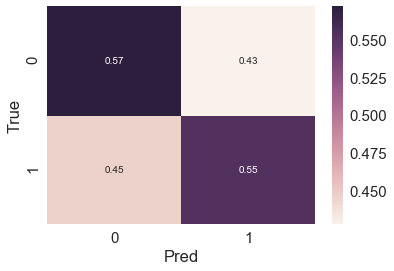

Confusion Matrix:
[[813 608]
 [674 836]]


In [33]:
# Get confusion matrix on test set
y_pred = tm.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

<a id="demo-overfitting-in-decision-trees"></a>
## Demo: Overfitting in decision trees
Objective: Understand the differences between linear and non-linear models

Decision trees tend to be weak models because they can easily memorize or overfit to a dataset.

A model is overfit when it memorizes or bends to a few specific data points rather than picking up general trends in the data.

An unconstrained decision tree can learn an extreme tree (e.g. one feature for each word in a news article).

We can limit our decision trees using a few methods.
Limiting the number of questions (nodes) a tree can have).
Limiting the number of samples in the leaf nodes.


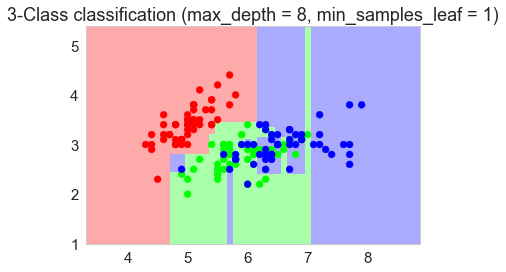

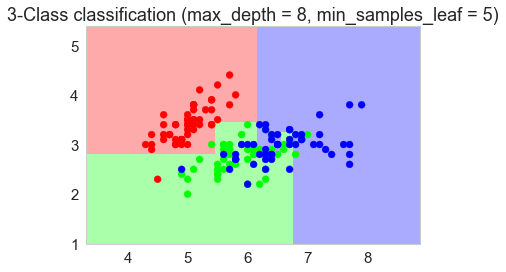

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

hyperparameters = [(8, 1), (8, 5)]

# import some data to play with
iris = datasets.load_iris()
X_iris = iris.data[:, :2]  # we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
y_iris = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for max_depth, min_samples_leaf in hyperparameters:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = tree.DecisionTreeClassifier(max_depth=max_depth, 
                                      min_samples_leaf=min_samples_leaf)
    clf.fit(X_iris, y_iris)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_iris[:, 0].min() - 1, X_iris[:, 0].max() + 1
    y_min, y_max = X_iris[:, 1].min() - 1, X_iris[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (max_depth = %i, min_samples_leaf = %i)"
              % (max_depth, min_samples_leaf))

**knowledge check**

Looking at the above chart it should be clear that the top graph shows a Decision Tree that is over-fitting. Out of max_depth and min_samples_leaf, which parameter do you think would be the best to use in this case to control the over-fit?

<!--
ANSWER:

There are two important patterns in the graphs above. You can see small clusters that contain only one point, this is very likely to be noise. You can also see You can also see that the interaction between our two variables is important as we need to approximate diagnol lines to separate the red and green classes. 

We can control overfitting either by reducing that max_depth or by increasing the number of samples required to remain in a leaf.

In this case we don't want to get rid of the diagnols, so we want to keep max_depth at a reasonable level, but we can find noisy cases where we focus in one one point. Those noisy cases can be avoided by increasing the min_samples_leaf parameter.
-->

<a id="-check-if-the-model-is-overfit-by-checking-accuracy-on-training-set-vs-test-set"></a>
### 3.1 Check if the model is overfit by checking accuracy on training set vs test set

In [35]:
# Evaluate model on train set
print "Accuracy: %0.3f" % tm.score(X_train, y_train)

# Evaluate model on test set
print "Accuracy: %0.3f" % tm.score(X_test, y_test)

Accuracy: 1.000
Accuracy: 0.563


<a id="-demo-bias-vs-variance"></a>
### 3.2 Demo: Bias vs. Variance
Control for overfitting in the decision model by adjusting the maximum number of questions (max_depth) or the minimum number of records in each final node (min_samples_leaf)

In [36]:
# Instantiate model using default params
tm = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=5)

# Train model on training set
tm.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [37]:
# Evaluate model on train set
print "Accuracy: %0.3f" % tm.score(X_train, y_train)

# Evaluate model on test set
print "Accuracy: %0.3f" % tm.score(X_test, y_test)

Accuracy: 0.644
Accuracy: 0.605


<a id="introduction-ensembles-and-random-forests"></a>
## Introduction: Ensembles and random forests
Objective: Understand random forest models for classification and regression

Let's pretend that instead of building a single model to solve a binary classification problem, you created **five independent models**, and each model was correct about 70% of the time. If you combined these models into an "ensemble" and used their majority vote as a prediction, how often would the ensemble be correct?

<a id="what-is-ensembling"></a>
## What is ensembling?
**Ensemble learning (or "ensembling")** is the process of combining several predictive models in order to produce a combined model that is more accurate than any individual model.
- **Regression**: take the average of the predictions
- **Classification**: take a vote and use the most common prediction, or take the average of the predicted probabilities

For ensembling to work well, the models must have the following characteristics:
- **Accurate**: they outperform the null model
- **Independent**: their predictions are generated using different processes

    **The big idea**: If you have a collection of individually imperfect (and independent) models, the "one-off" mistakes made by each model are probably not going to be made by the rest of the models, and thus the mistakes will be discarded when averaging the models.

![](./assets/images/crowdflower_ensembling.jpg)

<a id="bagging-bootstrap-aggregation"></a>
<a id="bagging-bootstrap-aggregation"></a>
<a id="bagging-bootstrap-aggregation"></a>
### Bagging: bootstrap aggregation

The primary weakness of **decision trees** is that they don't tend to have the best predictive accuracy. This is partially due to **high variance**, meaning that different splits in the training data can lead to very different trees.

**Bagging** is a general purpose procedure for reducing the variance of a machine learning method, but is particularly useful for decision trees. Bagging is short for **bootstrap aggregation**, meaning the aggregation of bootstrap samples.

What is a **bootstrap sample**? A random sample with replacement:

**How does bagging work (for decision trees)?**
1. Grow B trees using B bootstrap samples from the training data.
2. Train each tree on its bootstrap sample and make predictions.
3. Combine the predictions:
 - Average the predictions for regression trees
 - Take a vote for classification trees

<a id="random-forests"></a>
<a id="random-forests"></a>
<a id="random-forests"></a>
<a id="random-forests"></a>
<a id="random-forests"></a>
## Random Forests
Random Forests is a slight variation of bagged trees that has even better performance:
- Exactly like bagging, we create an ensemble of decision trees using bootstrapped samples of the training set.
- However, when building each tree, each time a split is considered, a random sample of m features is chosen as split candidates from the full set of p features. The split is only allowed to use one of those m features.
- A new random sample of features is chosen for every single tree at every single split.
- For classification, m is typically chosen to be the square root of p.
- For regression, m is typically chosen to be somewhere between p/3 and p.

**What's the point?**

Suppose there is **one very strong feature** in the data set. When using bagged trees, most of the trees will use that feature as the top split, resulting in an ensemble of similar trees that are **highly correlated**.
- Averaging highly correlated quantities does not significantly reduce variance (which is the entire goal of bagging).
- By randomly leaving out candidate features from each split, **Random Forests "decorrelates" the trees**, such that the averaging process can reduce the variance of the resulting model.

<a id="codealong-regression-with-decision-trees-and-random-forests"></a>
<a id="codealong-regression-with-decision-trees-and-random-forests"></a>
<a id="codealong-regression-with-decision-trees-and-random-forests"></a>
<a id="codealong-regression-with-decision-trees-and-random-forests"></a>
<a id="codealong-regression-with-decision-trees-and-random-forests"></a>
## Codealong: Regression with decision trees and random forests
Objective: Build random forest models for classification and regression

- Random forest models are one of the most widespread classifiers used.
- They are relatively simple to use and help avoid overfitting.
- Random Forests are an ensemble or collection of individual decision trees.

**Training an Random Forest**

Training a random forest model involves training many decision tree models.

Since decision trees overfit easily, we use many decision trees together and randomize the way they are created.


![](assets/images/tree_ensemble.png)

**Random Forest Algorithm**

1. Take a bootstrap sample of the dataset. (Sample random rows)
2. Train a decision tree on the bootstrap sample.  For each split/feature selection, only evaluate a limited number of features to find the best one.
3. Repeat this for N trees.

**How do I make predictions with a collection of trees?**
- Predictions for a random forest model come from each decision tree.
- Make an individual prediction with each decision tree.
- Combine the individual predictions and take the majority vote or average in the case of regression.

**Why does this work?**
- A tree with a large depth is relatively low bias and high variance
- When we average the predictions of the trees we reduce the variance
- The amazing part is that we don't raise the bias unless the trees are correlated
- We get a sharper estimation of the predictions, just like taking the mean of a large sample vs a small sample

**Real world application**

Ensembling is one of the secret sauces to Kaggle competitions.

Ensembling is not only limited to trees, you can use any other model or a mix of models to ensemble, provided that their predictions are generally uncorrelated and are better than random. 

This means that you should mix models that work differently from each other, such as linear vs non-linear.

**knowledge check**

Can someone describe in words what they would do to create an ensemble of models in scikit-learn?

<!--
ANSWER:
    1. Run fit on each model
    2. Run predict on each model
    3. Combine the predictions as columns in a dataframe
    4. Average the columns horizontally in the case of regression
      - Select the most common class in the case of classification
    5. Use the resulting column as your new predictions
-->

# Codealong: Evaluate random forests using cross-validation
Objective: Know how to extract the most important predictors in a random forest model

# Part 4: Random Forests

<a id="-demo-build-a-random-forest-model-to-predict-the-evergreeness-of-a-website"></a>
### 4.1 Demo: Build a random forest model to predict the evergreeness of a website. 

In [56]:
from sklearn import ensemble

In [57]:
# Instantiate model
rf = ensemble.RandomForestClassifier()

In [58]:
# Train model on training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [59]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train)

Accuracy: 0.970


In [60]:
# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test)

Accuracy: 0.575


<a id="-tune-and-update-the-model-with-grid-search"></a>
### 4.2 Tune and update the model with grid search

In [73]:
# Set list of values to grid search over
n = [1, 2, 3, 10, 20, 30, 100, 200, 300]
params = {'n_estimators': n}

In [74]:
# Perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(min_samples_leaf=30),
    param_grid=params)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=30,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 10, 20, 30, 100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [80]:
# Get best value to use
print "Best Params:"
print gs.best_params_

Best Params:
{'n_estimators': 300}


In [81]:
# Get improvement
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test)
print "Accuracy using best param: %0.3f" % gs.best_score_

Accuracy of current model: 0.592
Accuracy using best param: 0.637


In [77]:
gs.grid_scores_

[mean: 0.60214, std: 0.01607, params: {'n_estimators': 1},
 mean: 0.61169, std: 0.01766, params: {'n_estimators': 2},
 mean: 0.62147, std: 0.00988, params: {'n_estimators': 3},
 mean: 0.63171, std: 0.00851, params: {'n_estimators': 10},
 mean: 0.62466, std: 0.01550, params: {'n_estimators': 20},
 mean: 0.63239, std: 0.01905, params: {'n_estimators': 30},
 mean: 0.63512, std: 0.00988, params: {'n_estimators': 100},
 mean: 0.63581, std: 0.01556, params: {'n_estimators': 200},
 mean: 0.63717, std: 0.01635, params: {'n_estimators': 300}]

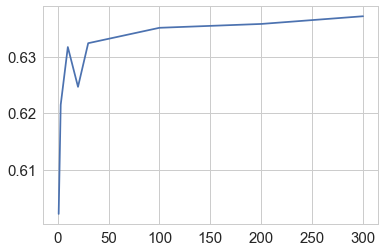

In [78]:
# Plot scores
plt.plot(n, [s[1] for s in gs.grid_scores_])

In [79]:
# Current model params
print rf
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Accuracy of current model: 0.592


In [69]:
# Update model params
rf.set_params(n_estimators=gs.best_params_['n_estimators'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [70]:
# Retrain model on new params
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [71]:
# Updated model params
print rf
print "Accuracy of updated model: %0.3f" % rf.score(X_test, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Accuracy of updated model: 0.592


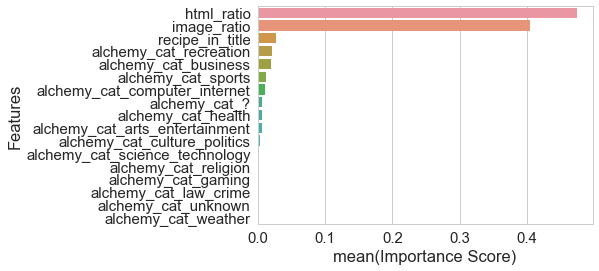

In [82]:
# Plot importances for all features
features = X.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

In [54]:
# Function to combine dummy features importances
def combine_dummies(dummy_prefixes):
    for p in dummy_prefixes:
        sub_keys = filter(lambda x: x.startswith(p), feature_dict)
        sub_keys_sum = sum([feature_dict[x] for x in sub_keys])
        for k in sub_keys: feature_dict.pop(k)
        feature_dict[p] = sub_keys_sum
    return feature_dict

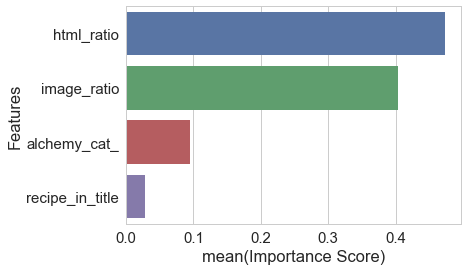

In [83]:
# Plot importances with dummy features combined
feature_names = X.columns
feature_importances = rf.feature_importances_
feature_dummy_prefixes = ['alchemy_cat_']

feature_dict = dict(zip(feature_names, feature_importances))
feature_dict = combine_dummies(feature_dummy_prefixes)

features_df = pd.DataFrame(feature_dict.items(), columns=['Features', 'Importance Score'])
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

<a id="topic-review"></a>
<a id="topic-review"></a>
<a id="topic-review"></a>
<a id="topic-review"></a>
## Topic review

What are decision trees?

<!--
- A machine learning algorithm that partitions the data into blocks by asking whether a specific data point is greater than or less than a particular value. We can then later use the means, medians, or most common class of the partition to make predictions on both regression and classification problems.
-->

What does training involve?

<!--
- To train a decision tree we pick a variable to split and see how well it discriminates our data. We try several variables to see which creates the best split based on a metric such as gini impurity or entropy. We then do split the data further until we are satisfied the our tree can explain our data.
-->

What are some common problems with decision trees?

<!--
- They are very likely to overfit if you grow a large enough tree and have trouble dealing with linear relationships or specific types of interactions between between variables. 
-->

What are random forests?

<!--
- Random forests, in essence, train many trees and average their results. This averaging process is called ensembling. By averaging the trees we trained on we balance out the tendency of trees to overfit by giving a more reserved guess on every data point. This has the astounding effect of not greatly impacting the bias of our algorithms, but greatly reducing the variance.
-->